# Implementation of topological morphology descriptors as a method of quantification for neuronal morphology 
## Persistence barcodes from swc files
- based on [Kanari et al.](../../readinglist/1603.08432.pdf)

In [3]:
import sys
sys.path.append('../..')
from nid import swcfunctions

In [4]:
# test data plucked from neuromorpho 
swcfunctions.preview_file('../../data/test_swc_data.swc')

First 15 lines of `../../data/test_swc_data.swc`:

0	# Original file F091109.swc edited using StdSwc version 1.31 on 6/24/15.

1	# Irregularities and fixes documented in F091109.swc.std. See StdSwc1.31.doc for more information.

2	#

3	# SWC to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu

4	# Original fileName:C:UserspraveenDesktopDataProcessingCurrentArchivesTo be processedAxon SticherBacciF091109.asc.swc_connected.swc

5	#

6	# generated by Vaa3D Plugin neuron_connector

7	1 1 0.0 0.0 0.0 10.37 -1

8	2 1 -3.97 -9.48 -1.36 10.37 1

9	3 1 3.97 9.48 1.36 10.37 1

10	4 3 3.96 6.86 0.44 .090 1

11	5 3 3.87 7.11 0.36 .090 4

12	6 3 5.71 12.38 3.21 .090 5

13	7 3 9.3 20.24 2.7 .090 6

14	8 3 9.67 20.35 0.85 .090 7



In [19]:
ntree = swcfunctions.NTree('../../data/test_swc_data.swc',skiprows=7)

In [7]:
! python -m pytest ../../nid

============================= test session starts ==============================
platform darwin -- Python 2.7.14, pytest-3.2.1, py-1.4.34, pluggy-0.4.0
rootdir: /Users/User1/DS/aibs, inifile:
plugins: cov-2.5.1
collected 1 item                                                                

../../nid/tests/test_swcfunctions.py .

=========================== 1 passed in 1.68 seconds ===========================


In [8]:
ntree = swcfunctions.NTree('../../data/test_swc_data.swc',skiprows=7)

In [60]:
ntree.df.head()

,type,x_coord,y_coord,z_coord,radius,parent,child_indices,euc_dist_to_root
1,1,0.00,0.00,0.00,10.37,-1,"[2, 3, 4, 299]",0.000000
2,1,-3.97,-9.48,-1.36,10.37,1,NaN,10.367300
3,1,3.97,9.48,1.36,10.37,1,NaN,10.367300
4,3,3.96,6.86,0.44,0.09,1,[5],7.933146
5,3,3.87,7.11,0.36,0.09,4,[6],8.102999


In [9]:
ntree.get_branch_nodes()

array([   1,   12,   22,   23,   86,   98,  111,  190,  229,  286,  299,
        312,  322,  342,  384,  385,  474,  524,  533,  708,  721,  750,
        752,  759,  778,  785,  913, 1006, 1028, 1038, 1219, 1237, 1246,
       1317, 1349, 1469, 1575, 1612, 1705, 1770, 1783, 1811, 1864, 1902,
       1912, 1913, 2042, 2139])

In [10]:
ntree.get_terminal_nodes()

array([   2,    3,   33,   64,   70,  132,  172,  208,  216,  263,  294,
        298,  340,  360,  422,  447,  467,  483,  686,  692,  704,  713,
        735,  767,  788,  819,  849,  959,  987, 1247, 1264, 1284, 1361,
       1468, 1482, 1491, 1538, 1598, 1677, 1787, 1815, 1822, 1844, 1929,
       1946, 1956, 1985, 2032, 2262, 2281, 2297])

In [11]:
ntree.get_euc_distance_to_root()

array([ 0.        , 10.36729955, 10.36729955, ..., 42.6790745 ,
       46.44995802, 46.65284021])

In [138]:
persistence_barcode = ntree.get_persistence_barcode()

In [91]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [102]:
pltparams = {'plot.linewidth':3.0, 
            }

In [151]:
def graph_persistence_barcode(pb): 
    plt.rcParams = plt.rcParamsDefault
    pb = sorted(pb, key=lambda x: abs(x[1]-x[0]))
    
    for i,a in enumerate(pb): 
        plt.plot((a[0],a[1]),(i,i),linewidth=3.0)
    plt.suptitle('Persistence Barcode Based on Euclidean Distance')
    plt.xlabel('Length')
    plt.ylabel('Barcode number')


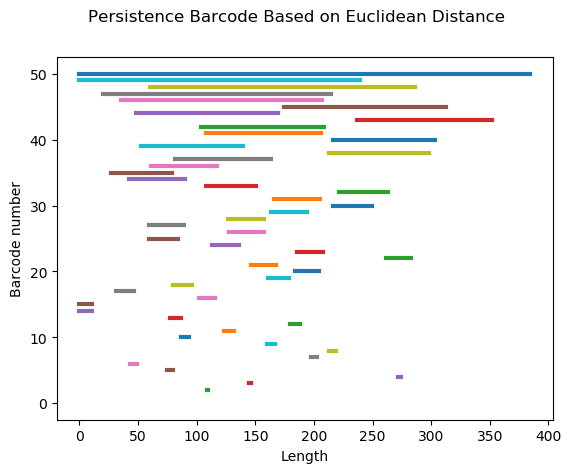

In [152]:
graph_persistence_barcode(persistence_barcode)

In [153]:
def persistence_diagram(pb): 
    plt.scatter(*zip(*pb),s=3)
    plt.suptitle('Persistence Diagram')
    plt.xlabel('Birth Distance')
    plt.ylabel('Death Distance')

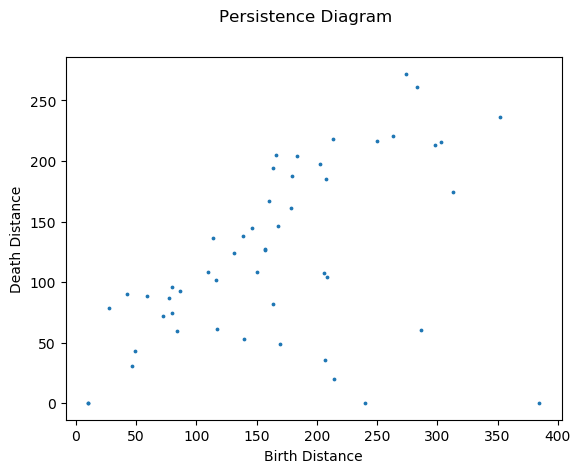

In [154]:
persistence_diagram(persistence_barcode)

In [146]:
# Note: This neuron has a soma that is represented by a sphere of radius ~10.36
# covering nodes 1-3, producing an identicl barcode starting at 0.  
persistence_barcode

[(262.8267151565837, 221.00978191021318),
 (351.903753034832, 236.47412226288102),
 (283.0626291123574, 261.0937505954518),
 (274.247913756878, 272.027715683531),
 (157.05494930119204, 126.92678440738976),
 (213.11714994340554, 218.56054309961806),
 (163.68148368095885, 193.93048264777767),
 (166.35292753660815, 205.04294062464086),
 (109.62098521724752, 108.75497643786237),
 (183.813466862469, 204.33548394735553),
 (202.8613837081863, 197.48002076159503),
 (138.6752483322096, 138.40350320710817),
 (117.53756420821388, 61.06499242610286),
 (249.740668694548, 216.47131195611118),
 (303.2188363212286, 215.85921638883065),
 (160.21558632043264, 166.62260770975828),
 (207.55600256316364, 185.44180920170078),
 (131.6497523734853, 123.67905117682622),
 (157.19923854777412, 127.49978745080321),
 (179.7316293811415, 187.77765202494143),
 (42.297218584677644, 90.31444513476237),
 (146.23715362383118, 144.89843132346186),
 (178.53471315125248, 160.80603502356496),
 (46.65284021364616, 30.7588426